In [1]:
using DataFrames

In [2]:
type NNparams
    a::Array{Float64}
end 
toyparams = NNparams([rand(),rand(),rand()])

NNparams([0.17091, 0.0229154, 0.582492])

In [3]:
function σ(z::Float64)
    return 1.0 / (1.0 + exp(-z))
end
σ(.5)

0.6224593312018546

In [4]:
function updateNNparams(gradient::Array{Float64,1}, 
                        params::NNparams, learning_rate::Float64)
   params.a = params.a - gradient*learning_rate
    return params
end


updateNNparams (generic function with 1 method)

In [5]:
function output(params::NNparams, x::Array{Float64,1})
    #nb_data = size(x[1,:])
    #for i = 1:nb_data
    #x = x[i, :]
    return σ(dot(params.a,x))
    #end
end 


output (generic function with 1 method)

In [6]:
 y_pred = zeros(length(yi))
q

LoadError: [91mUndefVarError: yi not defined[39m

In [7]:
function loss(params::NNparams, yi::Array{Float64,1}, 
                x::Array{Float64,2})
    nb_data = size(x)[1]
     y_pred = zeros(length(yi))
    @assert(size(x)[1]== length(yi))
   for i = 1:nb_data
        y_pred[i]= output(params,x[i,:])
    end
    return sum(yi.*log.(1e-7+y_pred) .+ (1-yi).*log.(1e-7+1-y_pred))
end

loss (generic function with 1 method)

In [8]:
#gradient 
function ∇(x::Array{Float64,2},y::Array{Float64,1}, params::NNparams)
    grad = [0.0 for i=1:size(x)[2]]
    nb_data = size(x)[1]
    for i = 1:nb_data
        xi = x[i, :]
        yi = y[i]
        y_pred = output(params, xi)
        grad = grad .+ xi.*(yi - y_pred)
    end
    grad = grad/ nb_data
    return grad::Array{Float64,1}
end

∇ (generic function with 1 method)

In [9]:
function convertdata_to_array(df::DataFrame)
    nb_data = size(df)[1]
        x = zeros(Float64, nb_data, 3)
        
        x[:,1] = df[:x1]
        x[:,2] = df[:x2]
        x[:,3] = ones(Float64,size(x)[1])
        
        y = convert(Array, df[:y]) * 1.0
        #x = convert(Array, df[:x1], df[:x2], ones(Float64, size(x)[1]))
        return x,y
    end

convertdata_to_array (generic function with 1 method)

In [10]:
function init_params(x::Array{Float64,2})
    return [rand() for i = 1:size(x[1, :])[1]]
    end 
test = init_params(rand(4,2))
x= rand(3,3)
test

2-element Array{Float64,1}:
 0.296109
 0.653936

In [11]:
function select_trainingdata(x::Array{Float64,2}, y::Array{Float64,1}, batch_size::Int)
    nb_data = length(y)
    
    ids = [i for i = 1:nb_data]
    sampled_ids = sample(ids, batch_size)
    
    x_training = x[sampled_ids, :]
    y_training = y[sampled_ids]
    
    return x_training, y_training
end


select_trainingdata (generic function with 1 method)

In [18]:
x,y = convertdata_to_array(dtf)
testparams = init_params(x)
typeof(x)

LoadError: [91mUndefVarError: dtf not defined[39m

In [13]:
function update_learning_rate(init_learning_rate::Float64, nb_steps::Int)
    return init_learning_rate* ((1.0)/ (1.0 + (.05*nb_steps)))
end
    update_learning_rate(.7,10)

0.4666666666666666

In [22]:
dtf = readtable("data.csv")
x,y = convertdata_to_array(dtf)
nb_steps = 1000

params = NNparams(init_params(x))
param_history = NNparams[]
loss_history = Float64[]
output_history = Float64[]
grad_history = Float64[]
learning_rate_history = Float64[]

for s = 1:nb_steps  
    x_training,y_training = select_trainingdata(x,y,1000)
    grad = ∇(x_training, y_training, params)
    learning_rate = update_learning_rate(.07,s)
    params = updateNNparams(grad,params,learning_rate)
    
    loss_at_this_step = loss(params,y,x)
    @printf("Step %d / %d, loss = %f\n", s, nb_steps, loss_at_this_step)
    @printf("a_1 = %f, a_2 = %f, b = %f\n", params.a[1],params.a[2],
        params.a[3])
    #grad_at_this_step = ∇(x_training,y_training,params)
    @printf("\tgrad = %f\n", norm(grad))
    @printf("rate = %f\n",learning_rate)
    push!(param_history,params)
    push!(loss_history, loss_at_this_step)
    for i = 1:length(x_training[:,1])
       push!(output_history, output(params, x_training[i,:]))
    end
end
print

Step 1 / 1000, loss = -2250.858273
a_1 = 0.745302, a_2 = 0.332903, b = 0.214787
	grad = 2.520190
rate = 0.066667
Step 2 / 1000, loss = -2688.683468
a_1 = 0.879568, a_2 = 0.426600, b = 0.244743
	grad = 2.615573
rate = 0.063636
Step 3 / 1000, loss = -3092.157738
a_1 = 1.002142, a_2 = 0.512375, b = 0.272843
	grad = 2.500779
rate = 0.060870
Step 4 / 1000, loss = -3509.170382
a_1 = 1.131707, a_2 = 0.597306, b = 0.300857
	grad = 2.698842
rate = 0.058333
Step 5 / 1000, loss = -3913.983947
a_1 = 1.256959, a_2 = 0.683726, b = 0.329472
	grad = 2.764992
rate = 0.056000
Step 6 / 1000, loss = -4261.371546
a_1 = 1.368873, a_2 = 0.758839, b = 0.354773
	grad = 2.546853
rate = 0.053846
Step 7 / 1000, loss = -4598.012208
a_1 = 1.484062, a_2 = 0.834451, b = 0.380333
	grad = 2.702689
rate = 0.051852
Step 8 / 1000, loss = -4898.504548
a_1 = 1.593509, a_2 = 0.909289, b = 0.404529
	grad = 2.695532
rate = 0.050000
Step 9 / 1000, loss = -5145.643317
a_1 = 1.688307, a_2 = 0.980439, b = 0.427065
	grad = 2.499207

rate = 0.012727
Step 91 / 1000, loss = -7724.909345
a_1 = 5.736896, a_2 = 3.794883, b = 1.349749
	grad = 2.601713
rate = 0.012613
Step 92 / 1000, loss = -7727.709969
a_1 = 5.762695, a_2 = 3.814984, b = 1.355886
	grad = 2.662101
rate = 0.012500
Step 93 / 1000, loss = -7730.231044
a_1 = 5.787591, a_2 = 3.832171, b = 1.361522
	grad = 2.483833
rate = 0.012389
Step 94 / 1000, loss = -7732.868105
a_1 = 5.813607, a_2 = 3.850628, b = 1.367588
	grad = 2.643937
rate = 0.012281
Step 95 / 1000, loss = -7735.487718
a_1 = 5.839446, a_2 = 3.869544, b = 1.373673
	grad = 2.677532
rate = 0.012174
Step 96 / 1000, loss = -7737.996676
a_1 = 5.864277, a_2 = 3.888081, b = 1.379634
	grad = 2.614631
rate = 0.012069
Step 97 / 1000, loss = -7740.549511
a_1 = 5.890057, a_2 = 3.907249, b = 1.385569
	grad = 2.730129
rate = 0.011966
Step 98 / 1000, loss = -7743.049023
a_1 = 5.916789, a_2 = 3.925226, b = 1.391559
	grad = 2.761804
rate = 0.011864
Step 99 / 1000, loss = -7745.435918
a_1 = 5.942722, a_2 = 3.942595, b = 

Step 216 / 1000, loss = -7863.077042
a_1 = 7.993077, a_2 = 5.386436, b = 1.868675
	grad = 2.708036
rate = 0.005932
Step 217 / 1000, loss = -7863.485761
a_1 = 8.005048, a_2 = 5.395208, b = 1.871552
	grad = 2.559030
rate = 0.005907
Step 218 / 1000, loss = -7863.902563
a_1 = 8.017498, a_2 = 5.404081, b = 1.874463
	grad = 2.645742
rate = 0.005882
Step 219 / 1000, loss = -7864.322143
a_1 = 8.030270, a_2 = 5.413047, b = 1.877298
	grad = 2.707562
rate = 0.005858
Step 220 / 1000, loss = -7864.697822
a_1 = 8.041616, a_2 = 5.421142, b = 1.879929
	grad = 2.431571
rate = 0.005833
Step 221 / 1000, loss = -7865.117645
a_1 = 8.054075, a_2 = 5.430527, b = 1.882857
	grad = 2.732017
rate = 0.005809
Step 222 / 1000, loss = -7865.518538
a_1 = 8.066539, a_2 = 5.439031, b = 1.885697
	grad = 2.653971
rate = 0.005785
Step 223 / 1000, loss = -7865.919301
a_1 = 8.078716, a_2 = 5.447831, b = 1.888595
	grad = 2.655760
rate = 0.005761
Step 224 / 1000, loss = -7866.324255
a_1 = 8.091705, a_2 = 5.456282, b = 1.89147

Step 305 / 1000, loss = -7890.248953
a_1 = 8.957458, a_2 = 6.064774, b = 2.089932
	grad = 2.701167
rate = 0.004308
Step 306 / 1000, loss = -7890.477800
a_1 = 8.967180, a_2 = 6.071424, b = 2.092088
	grad = 2.788351
rate = 0.004294
Step 307 / 1000, loss = -7890.690236
a_1 = 8.975932, a_2 = 6.077868, b = 2.094100
	grad = 2.581703
rate = 0.004281
Step 308 / 1000, loss = -7890.913404
a_1 = 8.985141, a_2 = 6.084625, b = 2.096247
	grad = 2.722942
rate = 0.004268
Step 309 / 1000, loss = -7891.134508
a_1 = 8.994691, a_2 = 6.091025, b = 2.098354
	grad = 2.746649
rate = 0.004255
Step 310 / 1000, loss = -7891.342241
a_1 = 9.003277, a_2 = 6.097377, b = 2.100365
	grad = 2.561707
rate = 0.004242
Step 311 / 1000, loss = -7891.564464
a_1 = 9.012919, a_2 = 6.103904, b = 2.102458
	grad = 2.796840
rate = 0.004230
Step 312 / 1000, loss = -7891.772174
a_1 = 9.021930, a_2 = 6.110033, b = 2.104427
	grad = 2.626244
rate = 0.004217
Step 313 / 1000, loss = -7891.981486
a_1 = 9.030726, a_2 = 6.116425, b = 2.10646

rate = 0.003286
Step 407 / 1000, loss = -7907.703275
a_1 = 9.780944, a_2 = 6.641908, b = 2.277912
	grad = 2.777491
rate = 0.003279
Step 408 / 1000, loss = -7907.829159
a_1 = 9.787614, a_2 = 6.646668, b = 2.279482
	grad = 2.550592
rate = 0.003271
Step 409 / 1000, loss = -7907.963526
a_1 = 9.794946, a_2 = 6.651661, b = 2.281111
	grad = 2.763839
rate = 0.003263
Step 410 / 1000, loss = -7908.100389
a_1 = 9.802460, a_2 = 6.656678, b = 2.282807
	grad = 2.823491
rate = 0.003256
Step 411 / 1000, loss = -7908.237510
a_1 = 9.810065, a_2 = 6.661722, b = 2.284473
	grad = 2.855688
rate = 0.003248
Step 412 / 1000, loss = -7908.366701
a_1 = 9.817139, a_2 = 6.666516, b = 2.286087
	grad = 2.683578
rate = 0.003241
Step 413 / 1000, loss = -7908.488976
a_1 = 9.823766, a_2 = 6.671136, b = 2.287620
	grad = 2.543162
rate = 0.003233
Step 414 / 1000, loss = -7908.627686
a_1 = 9.831483, a_2 = 6.676322, b = 2.289300
	grad = 2.928857
rate = 0.003226
Step 415 / 1000, loss = -7908.766331
a_1 = 9.839063, a_2 = 6.681

a_1 = 10.497331, a_2 = 7.142816, b = 2.441922
	grad = 2.756639
rate = 0.002588
Step 522 / 1000, loss = -7919.772692
a_1 = 10.502638, a_2 = 7.146761, b = 2.443134
	grad = 2.602564
rate = 0.002583
Step 523 / 1000, loss = -7919.856142
a_1 = 10.508125, a_2 = 7.150733, b = 2.444430
	grad = 2.674818
rate = 0.002578
Step 524 / 1000, loss = -7919.939799
a_1 = 10.513767, a_2 = 7.154615, b = 2.445722
	grad = 2.708097
rate = 0.002574
Step 525 / 1000, loss = -7920.023718
a_1 = 10.519404, a_2 = 7.158624, b = 2.446976
	grad = 2.736827
rate = 0.002569
Step 526 / 1000, loss = -7920.110015
a_1 = 10.525232, a_2 = 7.162728, b = 2.448271
	grad = 2.825378
rate = 0.002564
Step 527 / 1000, loss = -7920.195352
a_1 = 10.530716, a_2 = 7.167107, b = 2.449530
	grad = 2.785798
rate = 0.002559
Step 528 / 1000, loss = -7920.275782
a_1 = 10.536041, a_2 = 7.171026, b = 2.450761
	grad = 2.632513
rate = 0.002555
Step 529 / 1000, loss = -7920.352188
a_1 = 10.541338, a_2 = 7.174481, b = 2.451965
	grad = 2.524419
rate = 0.

a_1 = 11.111131, a_2 = 7.575318, b = 2.582512
	grad = 2.538152
rate = 0.002112
Step 644 / 1000, loss = -7928.206837
a_1 = 11.115938, a_2 = 7.578421, b = 2.583549
	grad = 2.757906
rate = 0.002108
Step 645 / 1000, loss = -7928.263060
a_1 = 11.120370, a_2 = 7.581532, b = 2.584583
	grad = 2.618431
rate = 0.002105
Step 646 / 1000, loss = -7928.318050
a_1 = 11.124636, a_2 = 7.584626, b = 2.585607
	grad = 2.553735
rate = 0.002102
Step 647 / 1000, loss = -7928.373104
a_1 = 11.129076, a_2 = 7.587614, b = 2.586610
	grad = 2.594397
rate = 0.002099
Step 648 / 1000, loss = -7928.432125
a_1 = 11.133650, a_2 = 7.591037, b = 2.587668
	grad = 2.772197
rate = 0.002096
Step 649 / 1000, loss = -7928.490009
a_1 = 11.138305, a_2 = 7.594265, b = 2.588696
	grad = 2.751052
rate = 0.002093
Step 650 / 1000, loss = -7928.546617
a_1 = 11.142799, a_2 = 7.597444, b = 2.589724
	grad = 2.679996
rate = 0.002090
Step 651 / 1000, loss = -7928.603775
a_1 = 11.147300, a_2 = 7.600653, b = 2.590786
	grad = 2.698081
rate = 0.

a_1 = 11.735884, a_2 = 8.015085, b = 2.725694
	grad = 2.670753
rate = 0.001716
Step 797 / 1000, loss = -7935.544318
a_1 = 11.739645, a_2 = 8.017620, b = 2.726530
	grad = 2.691336
rate = 0.001714
Step 798 / 1000, loss = -7935.584073
a_1 = 11.743288, a_2 = 8.020144, b = 2.727376
	grad = 2.636093
rate = 0.001711
Step 799 / 1000, loss = -7935.623654
a_1 = 11.746967, a_2 = 8.022629, b = 2.728210
	grad = 2.642746
rate = 0.001709
Step 800 / 1000, loss = -7935.664669
a_1 = 11.750729, a_2 = 8.025259, b = 2.729074
	grad = 2.735361
rate = 0.001707
Step 801 / 1000, loss = -7935.706255
a_1 = 11.754682, a_2 = 8.027801, b = 2.729950
	grad = 2.803992
rate = 0.001705
Step 802 / 1000, loss = -7935.746047
a_1 = 11.758218, a_2 = 8.030434, b = 2.730807
	grad = 2.636637
rate = 0.001703
Step 803 / 1000, loss = -7935.786506
a_1 = 11.761907, a_2 = 8.033077, b = 2.731654
	grad = 2.713852
rate = 0.001701
Step 804 / 1000, loss = -7935.827979
a_1 = 11.765845, a_2 = 8.035654, b = 2.732519
	grad = 2.816504
rate = 0.

a_1 = 12.212879, a_2 = 8.350146, b = 2.834915
	grad = 2.661982
rate = 0.001466
Step 936 / 1000, loss = -7940.495268
a_1 = 12.216280, a_2 = 8.352488, b = 2.835677
	grad = 2.867598
rate = 0.001464
Step 937 / 1000, loss = -7940.525590
a_1 = 12.219402, a_2 = 8.354618, b = 2.836377
	grad = 2.627123
rate = 0.001463
Step 938 / 1000, loss = -7940.558824
a_1 = 12.222773, a_2 = 8.357038, b = 2.837127
	grad = 2.886273
rate = 0.001461
Step 939 / 1000, loss = -7940.589759
a_1 = 12.225840, a_2 = 8.359301, b = 2.837855
	grad = 2.657589
rate = 0.001460
Step 940 / 1000, loss = -7940.620288
a_1 = 12.229039, a_2 = 8.361392, b = 2.838569
	grad = 2.665926
rate = 0.001458
Step 941 / 1000, loss = -7940.650706
a_1 = 12.232108, a_2 = 8.363584, b = 2.839281
	grad = 2.634720
rate = 0.001457
Step 942 / 1000, loss = -7940.682641
a_1 = 12.235376, a_2 = 8.365865, b = 2.840020
	grad = 2.785445
rate = 0.001455
Step 943 / 1000, loss = -7940.713831
a_1 = 12.238475, a_2 = 8.368179, b = 2.840744
	grad = 2.706283
rate = 0.

print (generic function with 46 methods)


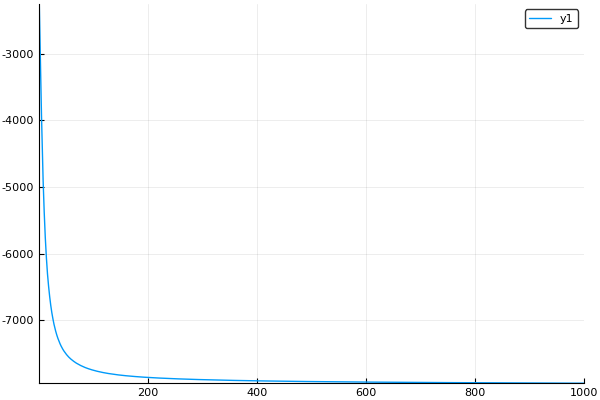

In [23]:
using Plots
x = [i for i= 1:nb_steps] ; y = loss_history
plot(x,y)


In [16]:
using Plots
        for i = 1:nb_steps
        x = params.a[1]*grad[i]
        y = parmas.a[2]*grad[i]
        end
plot(xi,yi)

LoadError: [91mUndefVarError: grad not defined[39m